# Assignment 3

1. Download the dataset:penguin_size is loaded

2. Load the dataset into the tool.

In [11]:
import pandas as pd

df = pd.read_csv('penguins_size.csv')

3. Perform Below Visualizations. ● Univariate Analysis● Bi- Variate Analysis● Multi-Variate Analysis

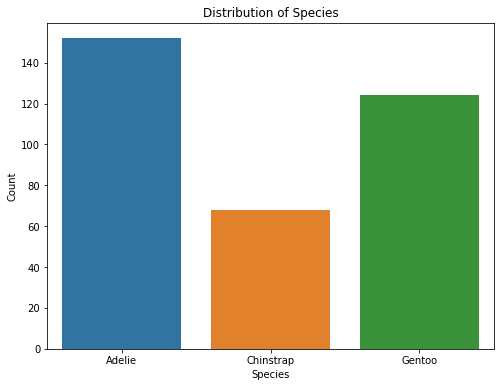

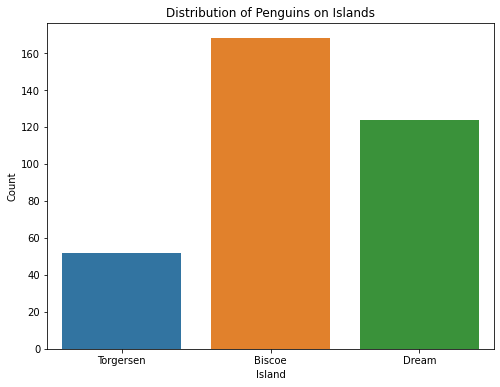

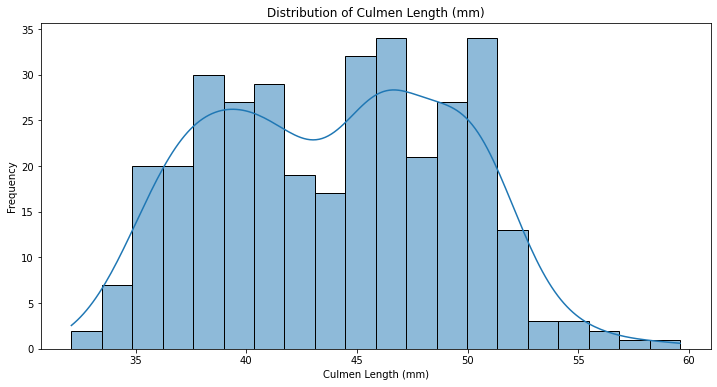

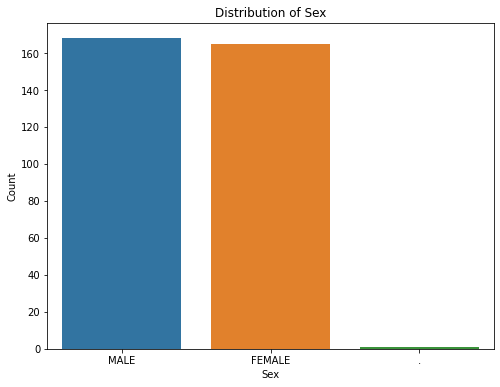

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns


# Univariate Analysis
# 1. Species
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='species')
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# 2. Island
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='island')
plt.title('Distribution of Penguins on Islands')
plt.xlabel('Island')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='culmen_length_mm', bins=20, kde=True)
plt.title('Distribution of Culmen Length (mm)')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Frequency')
plt.show()

# 4. Sex
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

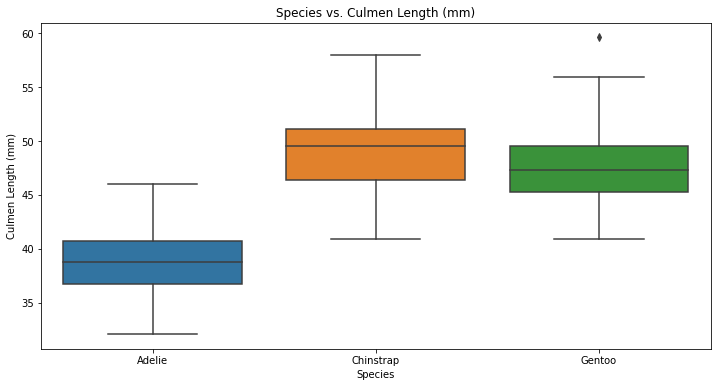

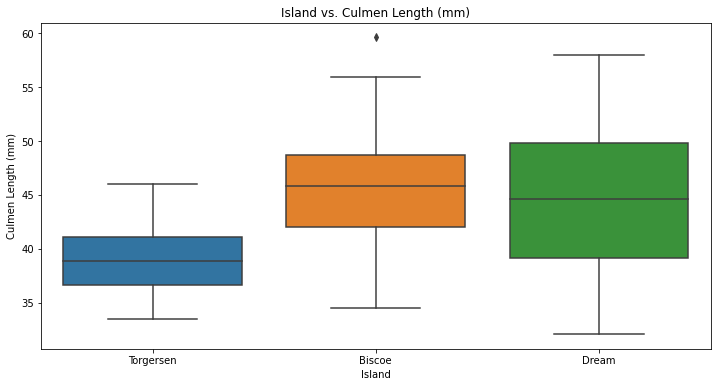

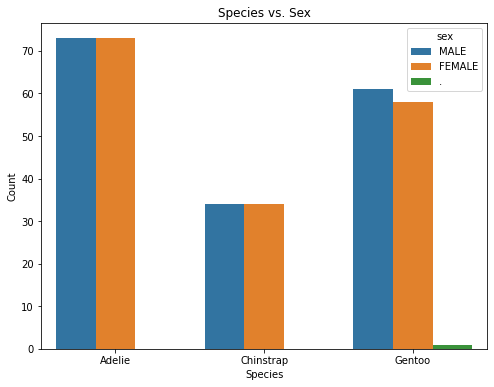

In [13]:

# Bivariate Analysis
# 1. Species vs. Numeric Variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='species', y='culmen_length_mm')
plt.title('Species vs. Culmen Length (mm)')
plt.xlabel('Species')
plt.ylabel('Culmen Length (mm)')
plt.show()

# 2. Island vs. Numeric Variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='island', y='culmen_length_mm')
plt.title('Island vs. Culmen Length (mm)')
plt.xlabel('Island')
plt.ylabel('Culmen Length (mm)')
plt.show()

# 3. Species vs. Sex
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='species', hue='sex')
plt.title('Species vs. Sex')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()



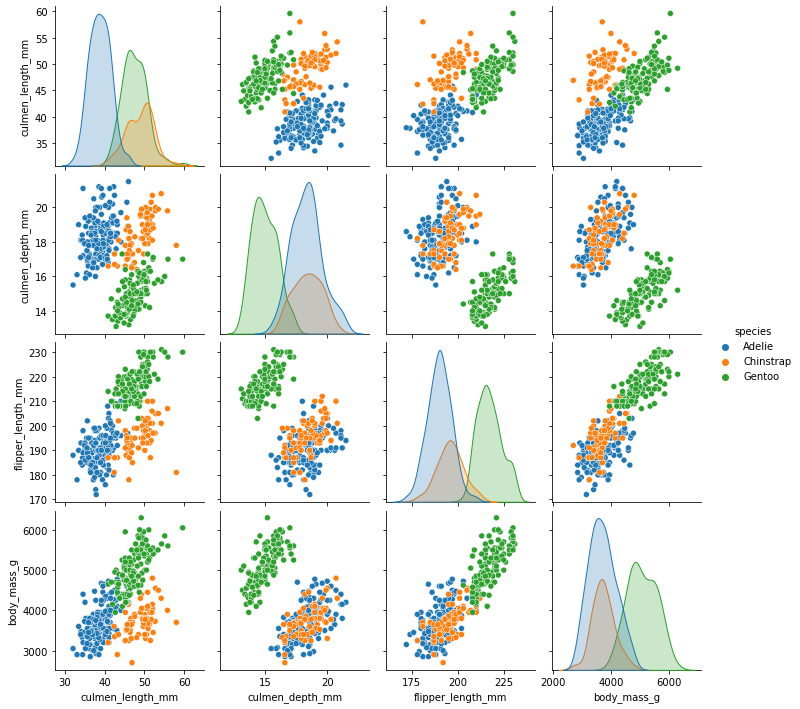

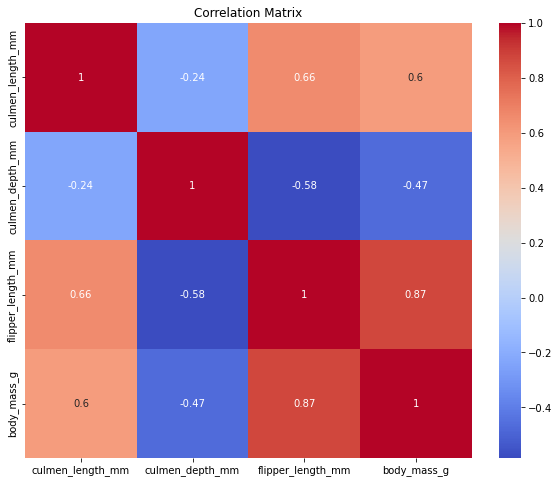

In [13]:
# Multivariate Analysis
sns.pairplot(df, hue='species')
plt.show()
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

4. Perform descriptive statistics on the dataset.

In [14]:
df.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

5. Check for Missing values and deal with them.

In [15]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [48]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

In [49]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

6. Find the outliers and replace them outliers

In [35]:
from scipy import stats
import numpy as np
z_scores = stats.zscore(df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])

In [36]:
threshold = 3
# Replace outliers with the median value of each column
for col in ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    df[col] = np.where(np.abs(z_scores[col]) > threshold, df[col].median(), df[col])
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen          39.10000         18.70000         181.000000   
1  Adelie  Torgersen          39.50000         17.40000         186.000000   
2  Adelie  Torgersen          40.30000         18.00000         195.000000   
3  Adelie  Torgersen          43.92193         17.15117         200.915205   
4  Adelie  Torgersen          36.70000         19.30000         193.000000   

   body_mass_g     sex  
0  3750.000000    MALE  
1  3800.000000  FEMALE  
2  3250.000000  FEMALE  
3  4201.754386    MALE  
4  3450.000000  FEMALE

7.Check the correlation of independent variables with the target


In [37]:
df.corr()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.235053           0.656181   
culmen_depth_mm           -0.235053         1.000000          -0.583851   
flipper_length_mm          0.656181        -0.583851           1.000000   
body_mass_g                0.595110        -0.471916           0.871202   

                   body_mass_g  
culmen_length_mm      0.595110  
culmen_depth_mm      -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000

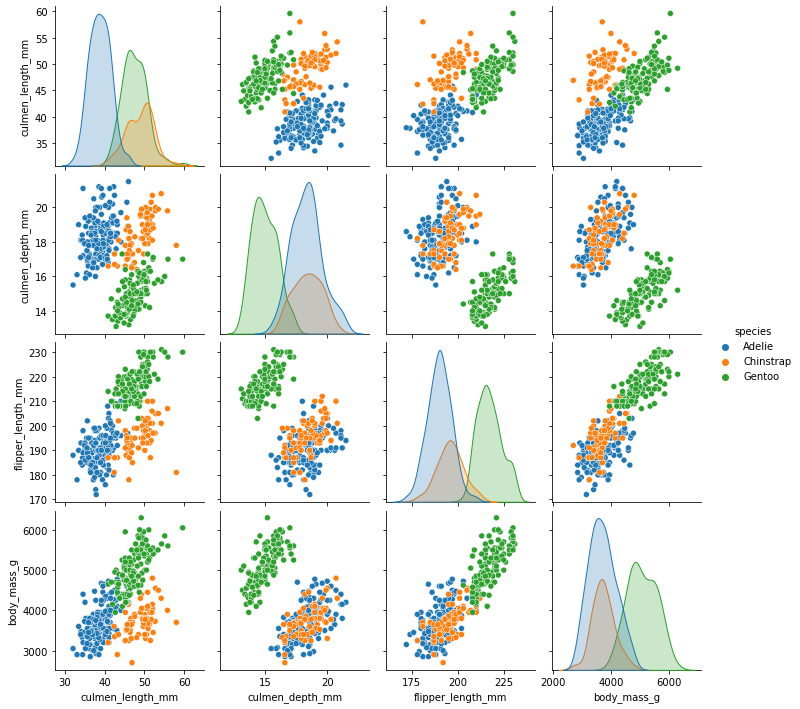

                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.235053           0.656181   
culmen_depth_mm           -0.235053         1.000000          -0.583851   
flipper_length_mm          0.656181        -0.583851           1.000000   
body_mass_g                0.595110        -0.471916           0.871202   

                   body_mass_g  
culmen_length_mm      0.595110  
culmen_depth_mm      -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000  


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('penguins_size.csv')
target_variable = 'species'
# Select the independent variables you want to analyze
independent_variables = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
# Create a pairplot to visualize the relationships
sns.pairplot(df, hue=target_variable, vars=independent_variables)
plt.show()

correlation_matrix = df[independent_variables + [target_variable]].corr()
print(correlation_matrix)

8. Check for Categorical columns and perform encoding.

In [51]:
categorical_columns = ['species', 'island', 'sex']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(df_encoded.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0          39.10000         18.70000         181.000000  3750.000000   
1          39.50000         17.40000         186.000000  3800.000000   
2          40.30000         18.00000         195.000000  3250.000000   
3          43.92193         17.15117         200.915205  4201.754386   
4          36.70000         19.30000         193.000000  3450.000000   

   species_Chinstrap  species_Gentoo  island_Dream  island_Torgersen  \
0                  0               0             0                 1   
1                  0               0             0                 1   
2                  0               0             0                 1   
3                  0               0             0                 1   
4                  0               0             0                 1   

   sex_FEMALE  sex_MALE  
0           0         1  
1           1         0  
2           1         0  
3           0         1  
4   

9. Split the data into dependent and independent variables

In [50]:
x = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = df[['species','island','sex']] 
print("Independent Variables:")
print(x.head())
print("\nDependent Variable:")
print(y.head())

Independent Variables:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0          39.10000         18.70000         181.000000  3750.000000
1          39.50000         17.40000         186.000000  3800.000000
2          40.30000         18.00000         195.000000  3250.000000
3          43.92193         17.15117         200.915205  4201.754386
4          36.70000         19.30000         193.000000  3450.000000

Dependent Variable:
  species     island     sex
0  Adelie  Torgersen    MALE
1  Adelie  Torgersen  FEMALE
2  Adelie  Torgersen  FEMALE
3  Adelie  Torgersen    MALE
4  Adelie  Torgersen  FEMALE


10. Scaling the data

In [61]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on independent variables
x_scalar = scaler.fit_transform(x)

In [62]:
print(x_scalar)

[[-0.88708123  0.78774251 -1.42248782 -0.56578921]
 [-0.81349399  0.12655633 -1.06535169 -0.50316788]
 [-0.66631952  0.43171918 -0.42250666 -1.19200251]
 ...
 [ 1.1917582  -0.73807176  1.50602843  1.93906399]
 [ 0.23512413 -1.19581604  0.79175618  1.25022936]
 [ 1.09977416 -0.53462985  0.8631834   1.50071468]]


11. Split the data into training and testing

In [64]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

12.check the training and testing data shape

In [65]:
# Check the shapes of the training and testing sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (275, 4)
Shape of x_test: (69, 4)
Shape of y_train: (275, 3)
Shape of y_test: (69, 3)
